# **Title: Exploratory Data Analysis of Credit Card Application Data:**

Title: Exploratory Data Analysis of Credit Card Application Data

Background: The bank's credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years. The system uses an application scorecard to determine the creditworthiness of applicants and estimate their level of risk. However, there may be opportunities to improve the credit approval process by gaining insights from the credit card application data.

Objective: The objective of this project is to conduct exploratory data analysis (EDA) on the credit card application data to gain insights into the factors that contribute to credit approval decisions. The analysis should identify any trends or patterns in the data that can inform improvements to the credit approval process.

Methodology: The project will involve the following steps:

Data Collection: The first step will be to collect credit card application data from the bank's credit card department. The data should include information on applicants' demographics, employment status, credit history, and other relevant information.

Data Cleaning: The collected data will need to be cleaned to remove any missing values, outliers, and inconsistencies. The data will also need to be transformed and encoded to make it suitable for analysis.

Exploratory Data Analysis: The cleaned data will be analyzed using various statistical techniques, such as descriptive statistics, correlation analysis, and data visualization. The analysis should identify any trends or patterns in the data that can inform improvements to the credit approval process.

Insights and Recommendations: The final step will be to summarize the insights gained from the analysis and make recommendations for improvements to the credit approval process. The recommendations may include changes to the credit scoring system, additional data sources, or changes in approval criteria.

Expected Outcome: The project is expected to provide insights into the factors that contribute to credit approval decisions and identify areas for improvement in the credit approval process. The insights can be used to inform the development of more sophisticated credit scoring models or to make changes to the existing credit approval process.

Deliverables: The project deliverables will include a report documenting the data collection and cleaning process, a detailed description of the EDA techniques used and their findings, and a summary of the insights gained and recommendations for improvements to the credit approval process. The code used to conduct the EDA should also be provided.

### **Hypothesis:**  

Hypothesis: The higher the annual income of a customer, the more likely they are to have a better credit worthiness score. Additionally, customers who are working professionals are more likely to have a better credit worthiness score compared to other employment types. Lastly, customers who own property are more likely to have a better credit worthiness score than those who do not own property.

Null hypothesis: There is no significant relationship between customers' annual income, employment type, property ownership, and their credit worthiness.

Alternative hypothesis: There is a significant relationship between customers' annual income, employment type, property ownership, and their credit worthiness.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#raw data set
df_raw = pd.read_csv('/Credit_card.csv')

In [6]:
#Make a copy of raw_data_set

df = df_raw.copy()
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


# **Observations from the Dataset**



* This dataset contains Null values in some columns such as Annual_income, Birthday_count,Type_Occupation...etc.  List item
* Birthday_count,Employed_days are in negative numbers. Hence we need to transform those columns as meaningful order.


In [7]:
#information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Dataset has 18 columns with 1548 rows. Out of 18 Columns:

10 columns are numerical columns. 10 columns are non-numerical(Categorical Columns)



In [ ]:
#Checking Null values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Dataset Contains Null values in Particular columns. There are 7 missing values in 'GENDER' column,23 Missing values in "Annual_income' and 488 Missing values 'Type_occupation column'.

In [ ]:
#Find unique Values in Each column.
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [ ]:
#Check if the data set contains  any duplicates.
df_duplicates = df[df.duplicated()]
df_duplicates

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members


There are no duplicates in Dataset.

# **Exploratory Data Analysis**

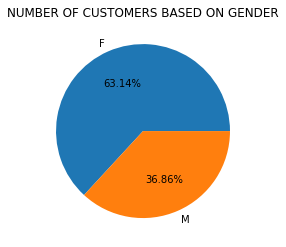

In [ ]:
# Graphical Representation of Customers Based on Gender
gender_value_counts = df['GENDER'].value_counts()

#Creating Pie_chart
plt.pie(gender_value_counts, labels= gender_value_counts.index, autopct='%1.2f%%')

#Add title to the chart
plt.title('NUMBER OF CUSTOMERS BASED ON GENDER')

#show the chart
plt.show()

According to the graphical representation this data set contains 63% of Female Customers and 37%(approx) Male Customers

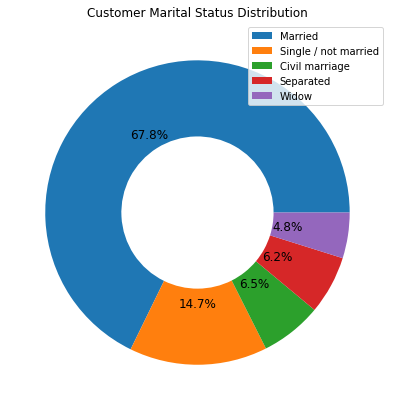

In [ ]:
#graphical representation of customers based on Marital Status

maritial_counts = df['Marital_status'].value_counts()

plt.figure(figsize = (7,7))
# Create a pie chart with a white circle in the middle(dough-nut chart)
plt.pie(maritial_counts,  autopct='%1.1f%%', wedgeprops={'width': 0.5}, textprops={'fontsize': 12})
circle=plt.Circle((0,0),0.4,color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Add a title
plt.title('Customer Marital Status Distribution')
plt.legend(labels = maritial_counts.index, loc = 'best')

# Show the chart
plt.show()


According to the graph No.of. customers based on Marital status 68%(approx) are married, 14.7% are Unmarried(Single), 6.5% are Civil Marriage, 6.2% are seperated, 4.8% are widow.

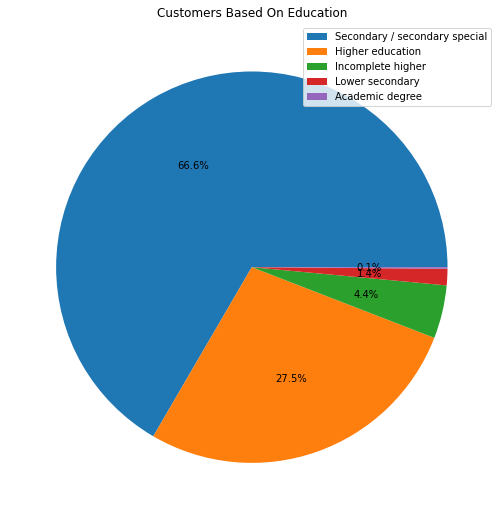

In [ ]:
#graphical representation of customers based on education. 
type_education = df['EDUCATION'].value_counts()

# Create Pie_chart
plt.figure(figsize = (9,9))
plt.pie(type_education, autopct='%1.1f%%')

# Add a title
plt.title('Customers Based On Education')
plt.legend(labels=type_education.index , loc = 'best')

# Show the chart
plt.show()

According to the graph No of Customers by Education Type figure 66.6% have secondary education, 27.5% are have higher education, 4.4% are incomplete higher education,1.4% are lower Secondary, and 0.1% are Academic degree holders.

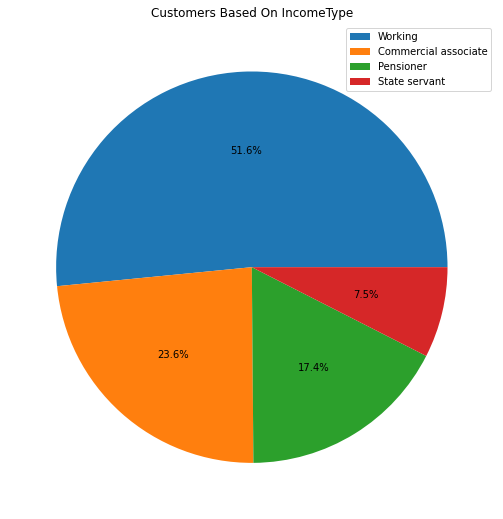

In [ ]:
#graphical representation on Customers based on Income type.
incometype_counts = df['Type_Income'].value_counts()
#create pie chart
plt.figure(figsize = (9,9))
plt.pie(incometype_counts,autopct='%1.1f%%')

# Add a title
plt.title('Customers Based On IncomeType')
plt.legend(labels=incometype_counts.index , loc = 'best')

# Show the chart
plt.show()

Based on the graphical Representation , 51.6% customers are working professionals,23.6% are commercial associaters, 17.4% are pensioners and 7.5% are state servants.

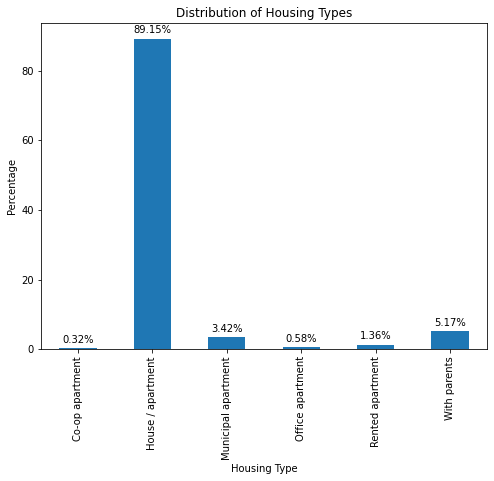

In [ ]:
#creating bar plot  based on HouseType of the Customers.
# Create a new figure
fig = plt.figure(figsize=(8,6))

# Group the data by Housing_Type and count the number of occurrences
counts = df.groupby('Housing_type')['Housing_type'].count()

# Calculate the percentage for each Housing_Type
percentages = counts / counts.sum() * 100

# Create a vertical bar chart with the percentages displayed on top of the bars
ax = percentages.plot(kind='bar')
ax.set_xlabel('Housing Type')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Housing Types')

# Add percentages to the top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, 
            str(round(i.get_height(), 2)) + '%', ha='center', va='bottom')

# Display the chart
plt.show()

According to the graph there Most of the people live in House/Apartments. Few people lived with their parents, few more people live in Muncipal apartment.Remaining people live in office apartments and co-op apartments.

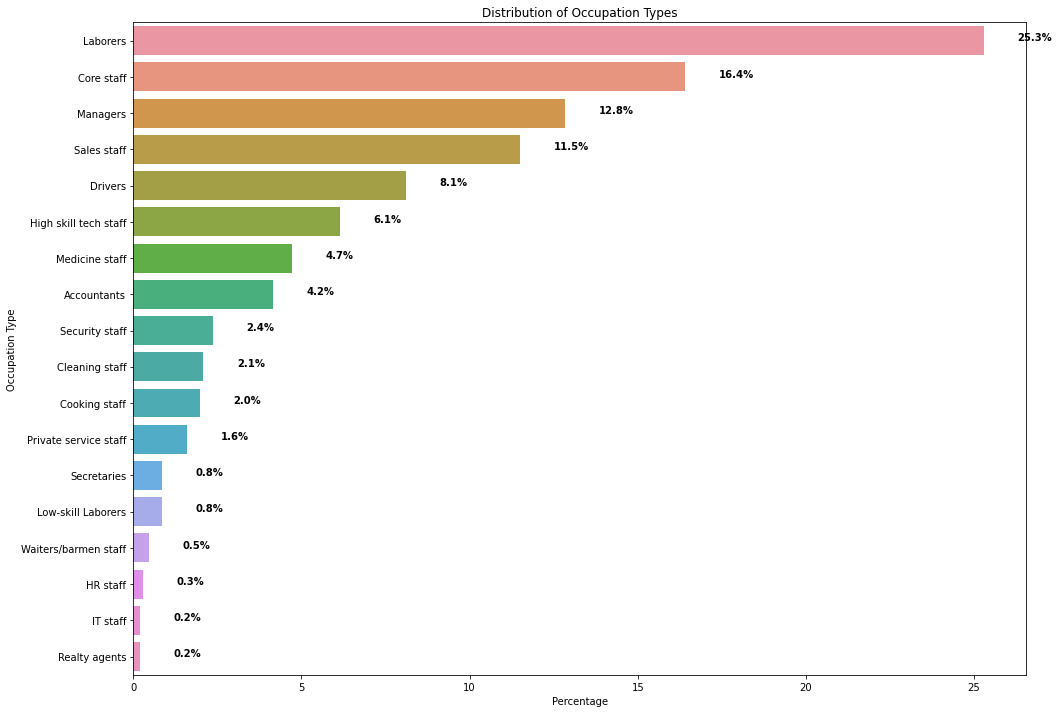

In [ ]:
#creating graphical representation based on Number of Customers by Occupation type

# Calculate the percentage values for each type of occupation
counts = df['Type_Occupation'].value_counts()

percentage = counts/counts.sum()*100

# Create horizontal bar plot using seaborn
plt.figure(figsize=(16, 12))
ax = sns.barplot(x=percentage, y=counts.index )

# Add percentage values on the bars
for i, v in enumerate(percentage.values):
    ax.text(v + 1, i, str(round(v, 1)) + '%', color='black', fontweight='bold')

# Set chart title and axis labels
ax.set_title('Distribution of Occupation Types')
ax.set_xlabel('Percentage')
ax.set_ylabel('Occupation Type')

# Show the chart
plt.show()


From the above chart No. Of Customers based on type of occupation are 25% laborers, 16% are core staff, 13% are managers, 11% are sales staff,8% are drivers and 6% are Highly skilled staff.

Text(0.5, 1.0, 'Distribution of customers based on car_own status')

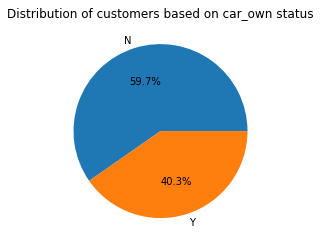

In [ ]:
plt.pie(df['Car_Owner'].value_counts(),labels = df['Car_Owner'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of customers based on car_own status')

According to pie chart approx 60% of customers having Own Car.40% of the customer does not own car.

<ipython-input-15-fb79ab84880c>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Type_Income', y='total', hue='Car_Owner', data=df.assign(total=1),


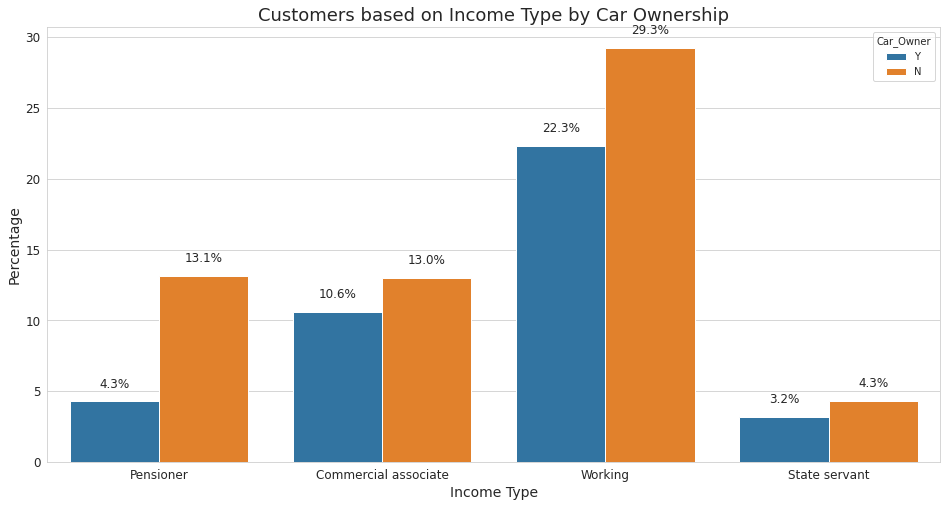

In [ ]:
# calculate the value counts of 'NAME_INCOME_TYPE' and 'FLAG_OWN_CAR'
counts = df.groupby(['Type_Income','Car_Owner']).size().unstack()

# calculate the total count for each 'NAME_INCOME_TYPE'
total_counts = counts.sum(axis=1)

# calculate the percentage of each category for each 'NAME_INCOME_TYPE'
percentages = counts.apply(lambda x: 100 * x / total_counts)

# create the bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Type_Income', y='total', hue='Car_Owner', data=df.assign(total=1), 
                 estimator=lambda x: len(x) / len(df) * 100, ci=None)

# add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

# set the x-axis and y-axis labels and title
ax.set_xlabel('Income Type', size=14)
ax.set_ylabel('Percentage', size=14)
ax.set_title('Customers based on Income Type by Car Ownership', size=18)

# set the font size for the x-axis and y-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# show the plot
plt.show()




4% pensioners,10.6% commercial associates , 22.3% working people , 4.3% state servants having own car. Remaining people does not have car.

Text(0.5, 1.0, 'Distribution of Applicants based on Property_Ownership')

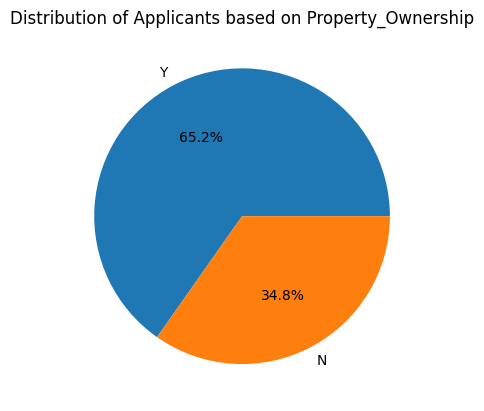

In [8]:
plt.pie(df['Propert_Owner'].value_counts(), labels = df['Propert_Owner'].value_counts().index, autopct = '%1.1f%%')

plt.title('Distribution of Applicants based on Property_Ownership')

# New Section

Based on the graph 65% people having properties with them. Remaining 35% people does not have any ownership.

# **Insights from the given dataset:**


1.   In the given dataset contains Most of the customers Females.(approx 63%).

2. Approx 68% people are married , remaining are single, widows and seperated from their partners.

3. Based on Education level most of the customers completed their secondary level education(approx 67%),27% people completed their Higher education and very few people completed their graduation.

4. Based on the graphical Representation , 51.6% customers are working professionals,23.6% are commercial associaters, 17.4% are pensioners and 7.5% are state servants.

5.  Based on the graphical Representation , 51.6% customers are working professionals,23.6% are commercial associaters, 17.4% are pensioners and 7.5% are state servants.

6. Most of the customers lived in House/ Apartments only. very few people lived with thier parents, Remaining people lived in rented Apartments,Muncipal Apartments,office Apartments and co-op Apartments also. 

7.   Distribution Of Customers based on type of occupation are 25% laborers, 16% are core staff, 13% are managers, 11% are sales staff,8% are drivers and 6% are Highly skilled staff.

8.   60% of the customers having their Own Car.40% of the customer does not own car.

9.   4% pensioners,10.6% commercial associates , 22.3% working people , 4.3% state servants having own car. Remaining people does not have car.

10.  Based on the property_status 65% people having their own_property. Remaining ,35% people does not have any ownership.













# **Data Cleaning:**

In [ ]:
#copy the dataframe  converting 'Birthday_counts' to Age and converting 'Employed_days' to 'YEARS_Employed' feature. 

new_df = df.copy()
# Create age feature
new_df['Age'] = round(-new_df['Birthday_count']/365.25)
new_df.drop('Birthday_count', axis=1, inplace=True)

# Create unemployed indicator(convert positive values into '0')

new_df.loc[new_df['Employed_days'] > 0, 'Employed_days'] = 0

# Create years employed feature
new_df['YEARS_EMPLOYED'] = round(-new_df['Employed_days']/365.25)
new_df.loc[new_df['YEARS_EMPLOYED'] < 0,'YEARS_EMPLOYED'] = 0
new_df.drop('Employed_days', axis=1, inplace=True)

### **Handling Missing Values** 

<Axes: >

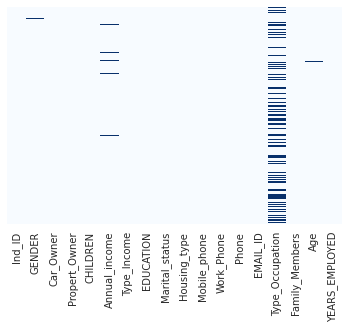

In [ ]:
#checking missing values
sns.heatmap(new_df.isnull(), cmap = 'Blues', yticklabels=False, cbar=False)

From the above figure we can observe some missing values in columns i.e. GENDER,Annual_income, Type_Occupation and Age. So we have to deal with these Missing values. 

1. Type_Occupation has more missing values compare to remaining columns. 

2. In Remaining columns Less amount of data is missing. so we can drop the columns. 

In [ ]:
#total null values in 'Type_Occupation' column.

new_df['Type_Occupation'].isnull().sum()

488

In [ ]:
#creating a dataframe variable for Type_occupation which contains null values.
x= new_df[new_df['Type_Occupation'].isna()]

print('Maximum Annual_income of Type_occupation which contains NaN values: ',x['Annual_income'].max())
print('Minimum Annual_income of Type_occupation which contains NaN values: ',x['Annual_income'].min())

Maximum Annual_income of Type_occupation which contains NaN values:  630000.0
Minimum Annual_income of Type_occupation which contains NaN values:  33750.0


In [ ]:
#finiding most occured Type_Occupation id dataframe.

new_df['Type_Occupation'].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [ ]:
#finding Max and Min Annual_income of Laborers.

df_labour = new_df[new_df['Type_Occupation'] ==  'Laborers']

print('Min Annual_income of laborers: ',df_labour['Annual_income'].min())
print('Max Annual_income of laborers: ',df_labour['Annual_income'].max())

Min Annual_income of laborers:  67500.0
Max Annual_income of laborers:  900000.0


In [ ]:
# Extracting Annual_income customers having Annual_income greater than or equal to 67,500/-

new_df[new_df['Annual_income'] <= 67500]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED
46,5047662,F,N,Y,1,67500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Accountants,3,52.0,11.0
71,5061360,M,N,Y,0,65250.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,57.0,0.0
74,5061691,F,N,Y,1,67500.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,1,Waiters/barmen staff,3,25.0,4.0
110,5113933,F,N,N,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,1,0,NaN,1,64.0,0.0
157,5142456,F,N,N,0,67500.0,Commercial associate,Higher education,Separated,House / apartment,1,0,1,0,Core staff,1,52.0,1.0
158,5142458,F,N,Y,0,67500.0,Commercial associate,Higher education,Separated,House / apartment,1,0,1,0,Core staff,1,52.0,1.0
159,5142459,F,N,Y,0,67500.0,Commercial associate,Higher education,Separated,House / apartment,1,0,1,0,Core staff,1,52.0,1.0
180,5066765,F,N,Y,1,63000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,3,40.0,8.0
184,5105818,F,N,Y,0,45000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,60.0,0.0
223,5046283,F,N,Y,0,67050.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,67.0,0.0


There are Total 488 missing columns.
 
1.   Most Occured Type_occupation is Laborers.
2.   In laborers also people having 67500 minimum salary and 9lakhs rupees as maximum salary.

3. In 'Type_Occupation' columnn missing rows ,minimum annual income of the people 33,750 rupees and maximum 6,30,000 rupees.

4.  There are so many occupations which is less than having minimum laborers salary such as accountants, core staff.etc.

5.  Hence I Replace the Type_occupation Nan Values with 'Other' category.

In [ ]:
#Repalcing Type_occupation Nan Values with 'other' category
new_df['Type_Occupation'].replace(np.nan,'other', inplace=True)

#drop null values if any 

new_df.dropna(inplace = True)
new_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,other,2,51.0,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,other,2,61.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,31.0,10.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,28.0,3.0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,36.0,7.0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,42.0,2.0


In [ ]:
#checking missing values if any

new_df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
Age                0
YEARS_EMPLOYED     0
dtype: int64

In [ ]:
#  Read csv files of credit_card_label DataFrame
df1 = pd.read_csv('/content/Credit_card_label.csv')
df1

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
#Merging DataFrames

Final_Credit_data = new_df.merge(df1, how='inner', on=['Ind_ID'])

Final_Credit_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,other,2,51.0,0.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
4,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,other,2,61.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,31.0,10.0,0
1492,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,28.0,3.0,0
1493,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,36.0,7.0,0
1494,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,42.0,2.0,0


In [ ]:
# checking merged dataframe contains null values
Final_Credit_data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
Age                0
YEARS_EMPLOYED     0
label              0
dtype: int64

# **Removing Outliers**


array([[<Axes: title={'center': 'Ind_ID'}>,
        <Axes: title={'center': 'CHILDREN'}>,
        <Axes: title={'center': 'Annual_income'}>],
       [<Axes: title={'center': 'Mobile_phone'}>,
        <Axes: title={'center': 'Work_Phone'}>,
        <Axes: title={'center': 'Phone'}>],
       [<Axes: title={'center': 'EMAIL_ID'}>,
        <Axes: title={'center': 'Family_Members'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'YEARS_EMPLOYED'}>,
        <Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

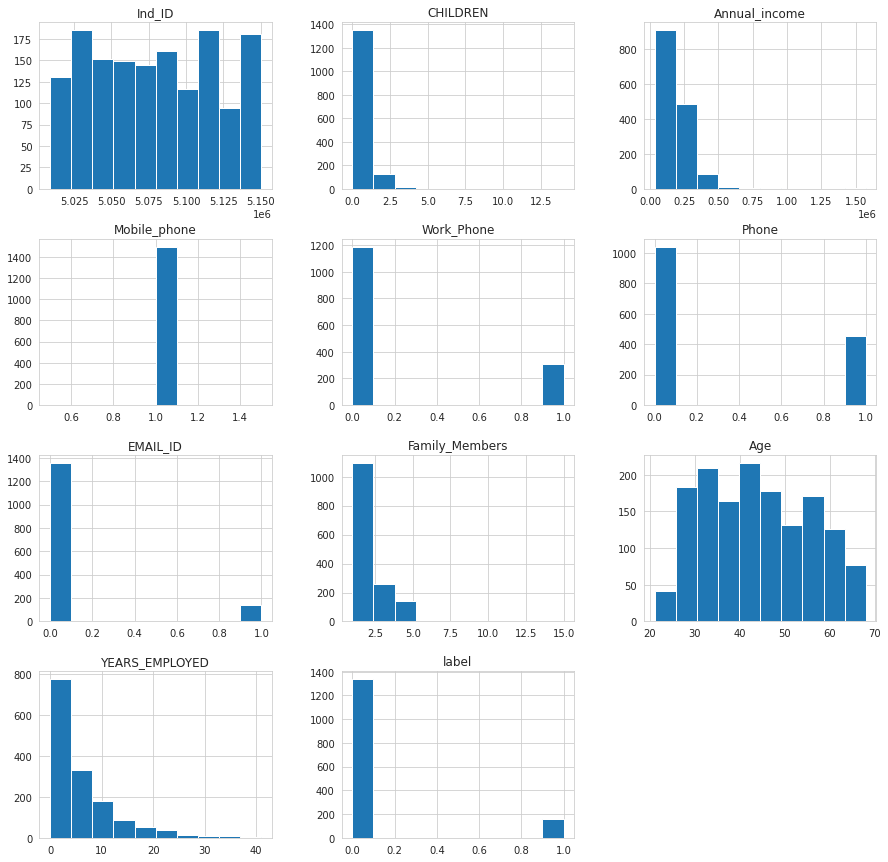

In [ ]:
#Plotting histograms
Final_Credit_data.hist(figsize = (15,15),bins = 10)

# **Checking Outliers by using Box plot**

<Axes: xlabel='CHILDREN'>

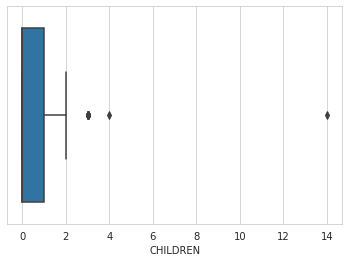

In [ ]:
#plotting box plot to check outliers

sns.boxplot(x=Final_Credit_data['CHILDREN'])





<Axes: xlabel='Annual_income'>

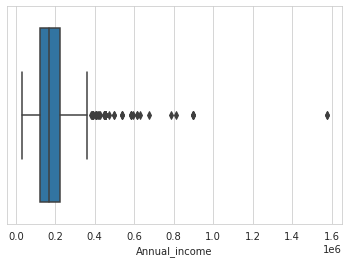

In [ ]:
# plotting box plot for Annual_income
sns.boxplot(x = Final_Credit_data['Annual_income'])

<Axes: xlabel='YEARS_EMPLOYED'>

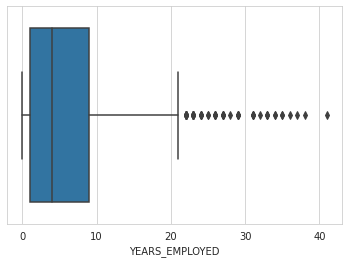

In [ ]:
#plotting box plot for 'YEARS_EMPLOYED'
sns.boxplot(x = Final_Credit_data['YEARS_EMPLOYED'])

<Axes: xlabel='Age'>

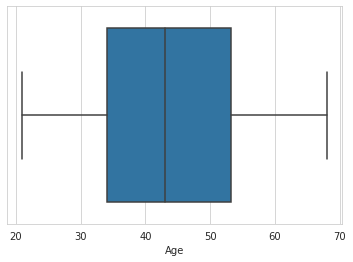

In [ ]:
#creating box plot for 'Age'
sns.boxplot(x = Final_Credit_data['Age'])


<Axes: xlabel='Family_Members'>

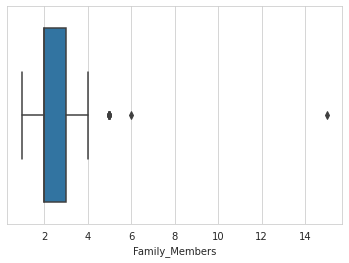

In [ ]:
#creating box plot for family_members
sns.boxplot(x = Final_Credit_data['Family_Members'])

# **Outliers Removal Using IQR Method:**

In [ ]:
#finding ourliers for 'children'.
Q1 = Final_Credit_data['CHILDREN'].quantile(0.25)
Q3 = Final_Credit_data['CHILDREN'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)




-1.5 2.5


In [ ]:
# Remove outliers from the 'CHILDREN' column

Final_Credit_data = Final_Credit_data[(Final_Credit_data['CHILDREN'] >= lower_bound) & (Final_Credit_data['CHILDREN'] <= upper_bound)]


In [ ]:
#finding ourliers for 'children'.

Q1 = Final_Credit_data['Annual_income'].quantile(0.25)
Q3 = Final_Credit_data['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

# Remove outliers from the 'Annual_income' column

Final_Credit_data = Final_Credit_data[(Final_Credit_data['Annual_income'] >= lower_bound) & (Final_Credit_data['Annual_income'] <= upper_bound)]


-37125.0 382275.0


In [ ]:
#finding ourliers for 'Age'.

Q1 = Final_Credit_data['Age'].quantile(0.25)
Q3 = Final_Credit_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

# Remove outliers from the 'Age' column

Final_Credit_data = Final_Credit_data[(Final_Credit_data['Age'] >= lower_bound) & (Final_Credit_data['Age'] <= upper_bound)]

4.0 84.0


In [ ]:
##finding ourliers for 'Years_Employed'.

Q1 = Final_Credit_data['YEARS_EMPLOYED'].quantile(0.25)
Q3 = Final_Credit_data['YEARS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

# Remove outliers from the 'Years_employed' column

Final_Credit_data = Final_Credit_data[(Final_Credit_data['YEARS_EMPLOYED'] >= lower_bound) & (Final_Credit_data['YEARS_EMPLOYED'] <= upper_bound)]

-11.0 21.0


In [ ]:
Final_Credit_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,other,2,51.0,0.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,other,2,37.0,2.0,1
4,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,other,2,61.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,31.0,10.0,0
1492,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,28.0,3.0,0
1493,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,36.0,7.0,0
1494,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,42.0,2.0,0


In [ ]:
#saving csv file 
new_df.to_csv('cleaned_data.csv', index=False, float_format='%.2f')

In [ ]:
#Merging Dataframes 
final_df = new_df.merge(df1[['Ind_ID', 'label']], how='inner', on=['Ind_ID'])
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,51.0,0.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,NaN,2.0,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,33.0,6.0,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,28.0,3.0,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,36.0,7.0,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,42.0,2.0,0


In [ ]:
#Saving final data into csv format
final_df.to_csv('cleaned_data.csv', index=False,float_format='%.2f')

This CSV file is used to further Sql Analysis.

# **Feature Engineering**

**Encoding Features:**

Now We are encoding categorical features into numerical format. 
GENDER,Car_Owner, Propert_Owner features are binary features as they are having two classes:
Gender----Female and Male

Car_Owner ----- Yes and No

Propert_Owner----Yes and No

For these columns We are encoding using binary encoding technique.

**Binary Encoding Features:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
final_df['GENDER'] = encoder.fit_transform(final_df['GENDER'])

#set gender value (M :1 , F:0). we can do it manually also by using replace final_data['Gender'] = final_data['Gender'].replace(['F','M'],[0,1])

In [ ]:
# encoding for car_owner column 

from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
final_df['Car_Owner'] = encoder.fit_transform(final_df['Car_Owner'])

#set car_owner Y:1,N:0

In [ ]:
#encoding Property_owner

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
final_df['Propert_Owner'] = encoder.fit_transform(final_df['Propert_Owner'])

#property_owner Y:1, N:0

In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED,label
0,5008827,1,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,51.0,0.0,1
1,5009744,0,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
2,5009746,0,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,NaN,2.0,1
3,5009749,0,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
4,5009752,0,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,37.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,33.0,6.0,0
1544,5023655,0,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,28.0,3.0,0
1545,5115992,1,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,36.0,7.0,0
1546,5118219,1,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,42.0,2.0,0


**Categorical-Nominal Encoding(pandas get_dummies) Method:**

In [ ]:
encoded_df = pd.get_dummies(final_df['Type_Income'], prefix='income_Type')

# concatenate the encoded dataframe with the original dataframe
final_df = pd.concat([final_df, encoded_df], axis=1)

# remove the original 'Type_Income' column
final_df = final_df.drop('Type_Income', axis=1)

In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Mobile_phone,...,EMAIL_ID,Type_Occupation,Family_Members,Age,YEARS_EMPLOYED,label,income_Type_Commercial associate,income_Type_Pensioner,income_Type_State servant,income_Type_Working
0,5008827,1,1,1,0,180000.0,Higher education,Married,House / apartment,1,...,0,NaN,2,51.0,0.0,1,0,1,0,0
1,5009744,0,1,0,0,315000.0,Higher education,Married,House / apartment,1,...,0,NaN,2,37.0,2.0,1,1,0,0,0
2,5009746,0,1,0,0,315000.0,Higher education,Married,House / apartment,1,...,0,NaN,2,NaN,2.0,1,1,0,0,0
3,5009749,0,1,0,0,NaN,Higher education,Married,House / apartment,1,...,0,NaN,2,37.0,2.0,1,1,0,0,0
4,5009752,0,1,0,0,315000.0,Higher education,Married,House / apartment,1,...,0,NaN,2,37.0,2.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,Higher education,Married,House / apartment,1,...,0,Managers,2,33.0,6.0,0,1,0,0,0
1544,5023655,0,0,0,0,225000.0,Incomplete higher,Single / not married,House / apartment,1,...,0,Accountants,1,28.0,3.0,0,1,0,0,0
1545,5115992,1,1,1,2,180000.0,Higher education,Married,House / apartment,1,...,0,Managers,4,36.0,7.0,0,0,0,0,1
1546,5118219,1,1,0,0,270000.0,Secondary / secondary special,Civil marriage,House / apartment,1,...,0,Drivers,2,42.0,2.0,0,0,0,0,1


In [ ]:
#encoding Marital Status column

encoded_df = pd.get_dummies(final_df['Marital_status'], prefix='M_status')

# concatenate the encoded dataframe with the original dataframe
final_df = pd.concat([final_df, encoded_df], axis=1)

# remove the original 'Type_Income' column
final_df = final_df.drop('Marital_status', axis=1)

In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Housing_type,Mobile_phone,Work_Phone,...,label,income_Type_Commercial associate,income_Type_Pensioner,income_Type_State servant,income_Type_Working,M_status_Civil marriage,M_status_Married,M_status_Separated,M_status_Single / not married,M_status_Widow
0,5008827,1,1,1,0,180000.0,Higher education,House / apartment,1,0,...,1,0,1,0,0,0,1,0,0,0
1,5009744,0,1,0,0,315000.0,Higher education,House / apartment,1,1,...,1,1,0,0,0,0,1,0,0,0
2,5009746,0,1,0,0,315000.0,Higher education,House / apartment,1,1,...,1,1,0,0,0,0,1,0,0,0
3,5009749,0,1,0,0,NaN,Higher education,House / apartment,1,1,...,1,1,0,0,0,0,1,0,0,0
4,5009752,0,1,0,0,315000.0,Higher education,House / apartment,1,1,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,Higher education,House / apartment,1,0,...,0,1,0,0,0,0,1,0,0,0
1544,5023655,0,0,0,0,225000.0,Incomplete higher,House / apartment,1,0,...,0,1,0,0,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,Higher education,House / apartment,1,0,...,0,0,0,0,1,0,1,0,0,0
1546,5118219,1,1,0,0,270000.0,Secondary / secondary special,House / apartment,1,1,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
#encoding Housing_type column

encoded_df = pd.get_dummies(final_df['Housing_type'], prefix='Housing')

# concatenate the encoded dataframe with the original dataframe
final_df = pd.concat([final_df, encoded_df], axis=1)

# remove the original 'Type_Income' column
final_df = final_df.drop('Housing_type', axis=1)

In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Mobile_phone,Work_Phone,Phone,...,M_status_Married,M_status_Separated,M_status_Single / not married,M_status_Widow,Housing_Co-op apartment,Housing_House / apartment,Housing_Municipal apartment,Housing_Office apartment,Housing_Rented apartment,Housing_With parents
0,5008827,1,1,1,0,180000.0,Higher education,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5009744,0,1,0,0,315000.0,Higher education,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2,5009746,0,1,0,0,315000.0,Higher education,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,5009749,0,1,0,0,NaN,Higher education,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5009752,0,1,0,0,315000.0,Higher education,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,Higher education,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1544,5023655,0,0,0,0,225000.0,Incomplete higher,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1545,5115992,1,1,1,2,180000.0,Higher education,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1546,5118219,1,1,0,0,270000.0,Secondary / secondary special,1,1,1,...,0,0,0,0,0,1,0,0,0,0


**Ordinal Encoding (Education column)**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']])

# fit and transform the 'Education' column using the encoder
final_df['EDUCATION'] = encoder.fit_transform(final_df[['EDUCATION']])





In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Mobile_phone,Work_Phone,Phone,...,M_status_Married,M_status_Separated,M_status_Single / not married,M_status_Widow,Housing_Co-op apartment,Housing_House / apartment,Housing_Municipal apartment,Housing_Office apartment,Housing_Rented apartment,Housing_With parents
0,5008827,1,1,1,0,180000.0,3.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5009744,0,1,0,0,315000.0,3.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2,5009746,0,1,0,0,315000.0,3.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,5009749,0,1,0,0,NaN,3.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5009752,0,1,0,0,315000.0,3.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,3.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1544,5023655,0,0,0,0,225000.0,2.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1545,5115992,1,1,1,2,180000.0,3.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1546,5118219,1,1,0,0,270000.0,1.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
duplicates = final_df.duplicated()

# count the number of duplicates
num_duplicates = duplicates.sum()

# print the number of duplicates
print(f'There are {num_duplicates} duplicate rows in the dataframe.')

There are 0 duplicate rows in the dataframe.


In [ ]:
#dropping the index column

final_df.drop('Ind_ID', axis = 1, inplace = True)

In [ ]:
final_df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,M_status_Married,M_status_Separated,M_status_Single / not married,M_status_Widow,Housing_Co-op apartment,Housing_House / apartment,Housing_Municipal apartment,Housing_Office apartment,Housing_Rented apartment,Housing_With parents
0,1,1,1,0,180000.0,3.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,315000.0,3.0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,315000.0,3.0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,NaN,3.0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,315000.0,3.0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,NaN,3.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1544,0,0,0,0,225000.0,2.0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1545,1,1,1,2,180000.0,3.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1546,1,1,0,0,270000.0,1.0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


Now given data is cleaned and no missing values and categorical features also encoded into numerical format.

Using Feature selection methods we can drop unnecessary columns.
(statistical methods include Gini coefficient, information gain, spearman rank correlation, pearson correlation.)

After dropping unnecessary columns we have to check whether the data is balanced or imbalanced.

If data is imbalanced we need to balanced the data by using some sampling methods. 

Finally create Machine learning Models and  by performing model validation choose the model which has highest accuracy.

